In [53]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import OrdinalEncoder
import pandas as pd
import os

In [54]:
df = pd.read_csv(os.path.join("Preprocessed_data.csv"), nrows= 500)
df.head()

,Unnamed: 0,user_id,location,age,isbn,rating,book_title,book_author,year_of_publication,publisher,img_s,img_m,img_l,Summary,Language,Category,city,state,country
0,0,2,"stockton, california, usa",18.0000,0195153448,0,Classical Mythology,Mark P. O. Morford,2002.0,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,Provides an introduction to classical myths pl...,en,['Social Science'],stockton,california,usa
1,1,8,"timmins, ontario, canada",34.7439,0002005018,5,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,"In a small town in Canada, Clara Callan reluct...",en,['Actresses'],timmins,ontario,canada
2,2,11400,"ottawa, ontario, canada",49.0000,0002005018,0,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,"In a small town in Canada, Clara Callan reluct...",en,['Actresses'],ottawa,ontario,canada
3,3,11676,"n/a, n/a, n/a",34.7439,0002005018,8,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,"In a small town in Canada, Clara Callan reluct...",en,['Actresses'],NaN,NaN,NaN
4,4,41385,"sudbury, ontario, canada",34.7439,0002005018,0,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,"In a small town in Canada, Clara Callan reluct...",en,['Actresses'],sudbury,ontario,canada


In [55]:
book_df = pd.DataFrame(df["book_title"])
book_df

,book_title
0,Classical Mythology
1,Clara Callan
2,Clara Callan
3,Clara Callan
4,Clara Callan
...,...
495,The Testament
496,The Testament
497,The Testament
498,The Testament


In [56]:
book_df_groups = df.groupby(['book_title'])
book_df_groups

In [57]:
group = book_df_groups.count()
group

,Unnamed: 0,user_id,location,age,isbn,rating,book_author,year_of_publication,publisher,img_s,img_m,img_l,Summary,Language,Category,city,state,country
book_title,,,,,,,,,,,,,,,,,,
A Second Chicken Soup for the Woman's Soul (Chicken Soup for the Soul Series),8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8
Clara Callan,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,13,13,12
Classical Mythology,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
Decision in Normandy,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
Flu: The Story of the Great Influenza Pandemic of 1918 and the Search for the Virus That Caused It,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11
Goodbye to the Buttermilk Sky,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,2
Hitler's Secret Bankers: The Myth of Swiss Neutrality During the Holocaust,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
Jane Doe,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
More Cunning Than Man: A Social History of Rats and Man,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3


In [58]:
group.sort_values(["user_id"], ascending= False)

,Unnamed: 0,user_id,location,age,isbn,rating,book_author,year_of_publication,publisher,img_s,img_m,img_l,Summary,Language,Category,city,state,country
book_title,,,,,,,,,,,,,,,,,,
The Testament,402,402,402,402,402,402,402,402,402,402,402,402,402,402,402,401,401,392
The Kitchen God's Wife,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,32,32,30
Clara Callan,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,13,13,12
Flu: The Story of the Great Influenza Pandemic of 1918 and the Search for the Virus That Caused It,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11
A Second Chicken Soup for the Woman's Soul (Chicken Soup for the Soul Series),8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8
Nights Below Station Street,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,5,5,5
What If?: The World's Foremost Military Historians Imagine What Might Have Been,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5
More Cunning Than Man: A Social History of Rats and Man,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
Goodbye to the Buttermilk Sky,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,2


In [90]:
# 11 is the median number of times a book is bought by our 278,858 users
# 48.7 is the mean number of times a book is bough by our 278,858 users
group["user_id"].median()

3.0

In [91]:
# Holes is a book bought 49 (mean) times
# Blind Date is a book bought 11 times

mean_books = group[group["user_id"] == 3]
mean_books

,Unnamed: 0,user_id,location,age,isbn,rating,book_author,year_of_publication,publisher,img_s,img_m,img_l,Summary,Language,Category,city,state,country
book_title,,,,,,,,,,,,,,,,,,
Decision in Normandy,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
Goodbye to the Buttermilk Sky,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,2
More Cunning Than Man: A Social History of Rats and Man,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
PLEADING GUILTY,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,2,2,2


Building a Book-User Matrix

In [61]:
user_book_df = df.drop(["Unnamed: 0", "location","age", "isbn", "rating", "book_author", "year_of_publication", "publisher", "img_m", "img_l", "img_s", "Summary", "city", "Language","Category", "state", "country"], axis=1)
user_book_df

,user_id,book_title
0,2,Classical Mythology
1,8,Clara Callan
2,11400,Clara Callan
3,11676,Clara Callan
4,41385,Clara Callan
...,...,...
495,260897,The Testament
496,261378,The Testament
497,261829,The Testament
498,262846,The Testament


In [62]:
user_matrix = pd.get_dummies(user_book_df["book_title"])
user_matrix

,A Second Chicken Soup for the Woman's Soul (Chicken Soup for the Soul Series),Clara Callan,Classical Mythology,Decision in Normandy,Flu: The Story of the Great Influenza Pandemic of 1918 and the Search for the Virus That Caused It,Goodbye to the Buttermilk Sky,Hitler's Secret Bankers: The Myth of Swiss Neutrality During the Holocaust,Jane Doe,More Cunning Than Man: A Social History of Rats and Man,Nights Below Station Street,PLEADING GUILTY,The Kitchen God's Wife,The Middle Stories,The Mummies of Urumchi,The Testament,The Witchfinder (Amos Walker Mystery Series),Under the Black Flag: The Romance and the Reality of Life Among the Pirates,What If?: The World's Foremost Military Historians Imagine What Might Have Been,Where You'll Find Me: And Other Stories
0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
496,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
497,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
498,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [63]:
combined_df = pd.concat([user_book_df,user_matrix], axis=1)
combined_df.drop(['book_title'], axis=1, inplace=True)
combined_df

,user_id,A Second Chicken Soup for the Woman's Soul (Chicken Soup for the Soul Series),Clara Callan,Classical Mythology,Decision in Normandy,Flu: The Story of the Great Influenza Pandemic of 1918 and the Search for the Virus That Caused It,Goodbye to the Buttermilk Sky,Hitler's Secret Bankers: The Myth of Swiss Neutrality During the Holocaust,Jane Doe,More Cunning Than Man: A Social History of Rats and Man,Nights Below Station Street,PLEADING GUILTY,The Kitchen God's Wife,The Middle Stories,The Mummies of Urumchi,The Testament,The Witchfinder (Amos Walker Mystery Series),Under the Black Flag: The Romance and the Reality of Life Among the Pirates,What If?: The World's Foremost Military Historians Imagine What Might Have Been,Where You'll Find Me: And Other Stories
0,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,8,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,11400,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,11676,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,41385,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,260897,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
496,261378,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
497,261829,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
498,262846,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [64]:
groups = combined_df.groupby('user_id')
groups

In [65]:
book_matrix = groups.sum()
book_matrix.head()

,A Second Chicken Soup for the Woman's Soul (Chicken Soup for the Soul Series),Clara Callan,Classical Mythology,Decision in Normandy,Flu: The Story of the Great Influenza Pandemic of 1918 and the Search for the Virus That Caused It,Goodbye to the Buttermilk Sky,Hitler's Secret Bankers: The Myth of Swiss Neutrality During the Holocaust,Jane Doe,More Cunning Than Man: A Social History of Rats and Man,Nights Below Station Street,PLEADING GUILTY,The Kitchen God's Wife,The Middle Stories,The Mummies of Urumchi,The Testament,The Witchfinder (Amos Walker Mystery Series),Under the Black Flag: The Romance and the Reality of Life Among the Pirates,What If?: The World's Foremost Military Historians Imagine What Might Have Been,Where You'll Find Me: And Other Stories
user_id,,,,,,,,,,,,,,,,,,,
2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,1,1,0,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1
9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
243,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
388,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [66]:
book_matrix.reset_index(level=0, inplace=True)



In [70]:
book_matrix.drop(['user_id'], axis=1, inplace=True)
book_matrix

,A Second Chicken Soup for the Woman's Soul (Chicken Soup for the Soul Series),Clara Callan,Classical Mythology,Decision in Normandy,Flu: The Story of the Great Influenza Pandemic of 1918 and the Search for the Virus That Caused It,Goodbye to the Buttermilk Sky,Hitler's Secret Bankers: The Myth of Swiss Neutrality During the Holocaust,Jane Doe,More Cunning Than Man: A Social History of Rats and Man,Nights Below Station Street,PLEADING GUILTY,The Kitchen God's Wife,The Middle Stories,The Mummies of Urumchi,The Testament,The Witchfinder (Amos Walker Mystery Series),Under the Black Flag: The Romance and the Reality of Life Among the Pirates,What If?: The World's Foremost Military Historians Imagine What Might Have Been,Where You'll Find Me: And Other Stories
0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
469,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
470,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
471,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
472,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [92]:
y = book_matrix["The Testament"]
y

0      0
1      0
2      1
3      1
4      1
      ..
469    1
470    1
471    0
472    0
473    0
Name: The Testament, Length: 474, dtype: uint8

In [93]:
X = book_matrix.drop("The Testament", axis=1)
X.head()

,A Second Chicken Soup for the Woman's Soul (Chicken Soup for the Soul Series),Clara Callan,Classical Mythology,Decision in Normandy,Flu: The Story of the Great Influenza Pandemic of 1918 and the Search for the Virus That Caused It,Goodbye to the Buttermilk Sky,Hitler's Secret Bankers: The Myth of Swiss Neutrality During the Holocaust,Jane Doe,More Cunning Than Man: A Social History of Rats and Man,Nights Below Station Street,PLEADING GUILTY,The Kitchen God's Wife,The Middle Stories,The Mummies of Urumchi,The Witchfinder (Amos Walker Mystery Series),Under the Black Flag: The Romance and the Reality of Life Among the Pirates,What If?: The World's Foremost Military Historians Imagine What Might Have Been,Where You'll Find Me: And Other Stories
0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [94]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [95]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScater model and fit it to the training data

X_scaler = StandardScaler().fit(X_train)

In [96]:
# Transform the training and testing data using the X_scaler and y_scaler models

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

k: 1, Train/Test Score: 0.949/0.899
k: 3, Train/Test Score: 0.983/0.966
k: 5, Train/Test Score: 0.966/0.966
k: 7, Train/Test Score: 0.958/0.958
k: 9, Train/Test Score: 0.946/0.958
k: 11, Train/Test Score: 0.946/0.958
k: 13, Train/Test Score: 0.932/0.958
k: 15, Train/Test Score: 0.913/0.950
k: 17, Train/Test Score: 0.913/0.950
k: 19, Train/Test Score: 0.913/0.950
k: 21, Train/Test Score: 0.885/0.933
k: 23, Train/Test Score: 0.885/0.933
k: 25, Train/Test Score: 0.885/0.933
k: 27, Train/Test Score: 0.885/0.933
k: 29, Train/Test Score: 0.885/0.933
k: 31, Train/Test Score: 0.885/0.933
k: 33, Train/Test Score: 0.885/0.933
k: 35, Train/Test Score: 0.885/0.933
k: 37, Train/Test Score: 0.842/0.866
k: 39, Train/Test Score: 0.842/0.866
k: 41, Train/Test Score: 0.842/0.866
k: 43, Train/Test Score: 0.842/0.866
k: 45, Train/Test Score: 0.842/0.866
k: 47, Train/Test Score: 0.842/0.866
k: 49, Train/Test Score: 0.842/0.866
k: 51, Train/Test Score: 0.842/0.866
k: 53, Train/Test Score: 0.842/0.866
k: 55,

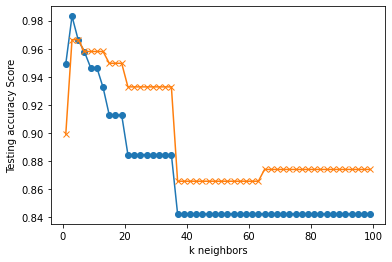

In [98]:
# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties
train_scores = []
test_scores = []
for k in range(1, 100, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 100, 2), train_scores, marker='o')
plt.plot(range(1, 100, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [99]:
# Note that k: 13 seems to be the best choice for this dataset
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train_scaled, y_train)
print('k=13 Test Acc: %.3f' % knn.score(X_test_scaled, y_test))

k=13 Test Acc: 0.950


In [100]:
new_iris_data = [[0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1]]
predicted_class = knn.predict(new_iris_data)
print(predicted_class)

[1]
